<a href="https://colab.research.google.com/github/laurash96/Women-economic-autonomy-2018-MEData/blob/main/Economic_Autonomy_Secretar%C3%ADa_de_las_Mujeres_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import file


* File name: autonomia_economica_secretaria_mujeres_2018.csv

* Description: "Es la recopilación del año 2018 desde la información de las mujeres que acceden al programa de ruta económica, donde se ven reflejados intereses y necesidades de las diferentes mujeres que acceden al programa."

* Author: "Secretaria de las Mujeres"

* Source: http://medata.gov.co/dataset/autonom%C3%ADa-econ%C3%B3mica-secretar%C3%ADa-de-las-mujeres-2018

In [49]:
path = '/content/drive/MyDrive/Economic Autonomy Dataset/autonomia_economica_secretaria_mujeres_2018.csv'
women_dataframe = pd.read_csv(path,delimiter=";",low_memory=False,parse_dates=True)
women_dataframe

,Fecha de elaboración de la ficha,Tipo de documento,Fecha de nacimiento,Edad,Estado Civil:,Barrio o Vereda (Tomar del listado oficial SUB),Comuna / Corregimiento (Tomar del listado oficial SUB),Estrato,Clasificación para el proyecto,Grupo étnico,...,¿Ha tenido otras unidades productivas/empresas?,"¿Cuál fue la principal razón para crear su unidad productiva/empresa? (Seleccionar una opción, la más importante):","¿Ha requerido de otras personas para la fabricación, transformación o comercialización de sus productos o la prestación de sus servicios?","¿A que fuentes de financiación ha accedido para fortalecer su negocio? (Seleccionar máximo 2 opciones, más recientes)",¿Su iniciativa está siendo acompañada actualmente en algún proceso de fortalecimiento empresarial?,¿Qué cree usted que necesita para fortalecer su negocio? (seleccionar máximo 2 opciones),En caso de requerir formación o asesoría: ¿En que áreas? (seleccionar máximo 2 opciones)107,¿Qué disponibilidad horaria tiene para su formación empresarial? (seleccionar una opción):108,¿Considera que ha tenido dificultades por ser mujer (Rural o Urbana) para desarrollar su emprendimiento?,¿Considera que ha tenido dificultades por su condición étnica (Indígena o afrodescendiente) para desarrollar su unidad productiva/empresa?
0,8/08/2018,CC,15/01/1972,46,Soltera(o),Los Angeles,La candelaria,4,Urbana,Mestiza,...,NO,Oportunidad en el mercado,NO,SI,SI,SI,NO,Jornada de la tarde,SI,NO
1,8/08/2018,CC,7/05/1966,52,Soltera(o),La Francia,Santa Cruz,2,Urbana,Mestiza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8/08/2018,CC,2/06/1970,48,Separada(o),Prado,La candelaria,3,Urbana,Mestiza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/08/2018,CC,15/03/1972,46,Divorciada(o),Castilla,Castilla,3,Urbana,Mestiza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8/08/2018,CC,21/08/1977,41,Soltera(o),La Rosa,Santa Cruz,2,Urbana,Mestiza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,30/08/2018,CC,23/10/1982,34,Soltera(o),El Pesebre,San Javier,1,Urbana,Mestiza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1568,22/09/2018,CC,25/06/1970,48,Casada(o),San Isidro,Aranjuez,3,Comuna 4 PP,Blanca,...,NO,Oportunidad en el mercado,SI,SI,NO,SI,NO,Jornada de la mañana,SI,NO
1569,8/11/2018,CC,15/05/1952,66,Casada(o),Robledo,Robledo,2,Urbana,Mestiza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1570,27/09/2018,CC,30/04/1982,36,Unión Libre,Santo Domingo Savio No.1,Popular,2,Urbana,Mestiza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleansing

NaN values are actually "N/A" (No Aplica). There are replaced

In [50]:
women_dataframe.fillna("Sin información", inplace = True)

Dataset info

In [51]:
women_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Columns: 111 entries, Fecha de elaboración de la ficha to ¿Considera que ha tenido dificultades por su condición étnica (Indígena o afrodescendiente) para desarrollar su unidad productiva/empresa?
dtypes: object(111)
memory usage: 1.3+ MB


Drop columns that are not going to be used

In [52]:
women_dataframe=women_dataframe.drop(columns = ['Sede:', 'Grupo', 'Fecha de elaboración de la ficha', '¿Cuál será el principal diferenciador de su emprendimiento (Seleccionar máximo 2):', 'Sector (seleccionar una opción, la más importante):73','¿Sabe conducir?',
 '¿Cuenta con licencia de conducción?', 'En caso de requerir formación o asesoría: ¿En que áreas?  (seleccionar máximo 2 opciones)78', '¿Qué cree usted que necesita para fortalecer su negocio? (seleccionar máximo 2 opciones)','Observaciones', 'En caso de requerir formación o asesoría: ¿En que áreas?  (seleccionar máximo 2 opciones)107', '¿A que fuentes de financiación ha accedido para fortalecer su negocio?  (Seleccionar máximo 2 opciones, más recientes)', '¿Cuál es el principal diferenciador de su unidad productiva/empresa (Seleccionar máximo 2):','En caso afirmativo, está registrado como:'], axis=1)

Identify unique values

In [53]:
# for i in (women_dataframe.columns):
#   print(i)
#   print(pd.unique(women_dataframe[i]))
#   print()

Replace misspelled or repeated values
e.g Rename {Union libre, Unión Libre, Union Libre} as Unión libre

In [54]:
for i in (women_dataframe.columns):
  women_dataframe[i].replace("5 AÑOS", "5 a 10 años",inplace=True)
  women_dataframe[i].replace("Administracion", "Administración",inplace=True)
  women_dataframe[i].replace("AGROAMBIENTAL", "Agroambiental",inplace=True)
  women_dataframe[i].replace("AMBOS", "Ambos",inplace=True)
  women_dataframe[i].replace("ARRENDADA", "Arrendada",inplace=True)
  women_dataframe[i].replace("ARRENDADO", "Arrendado",inplace=True)
  women_dataframe[i].replace("ARTES", "Artes",inplace=True)
  women_dataframe[i].replace("Arredada", "Arrendada",inplace=True)
  women_dataframe[i].replace("Ataques contra la poblacion civil", "Ataques contra la población civil",inplace=True)
  women_dataframe[i].replace("BELLEZA", "Belleza",inplace=True)
  women_dataframe[i].replace("Buscando Trabajo", "Buscando trabajo",inplace=True)
  women_dataframe[i].replace("Casada(o)", "Casada",inplace=True)
  women_dataframe[i].replace("CC\xa0", "CC",inplace=True)
  women_dataframe[i].replace("COLECTIVO", "Colectivo",inplace=True)
  women_dataframe[i].replace("COMERCIAL", "Comercial",inplace=True)
  women_dataframe[i].replace("COMERCIALIZACION", "Comercialización",inplace=True)
  women_dataframe[i].replace("Cuidado de la Familia", "Cuidado de la familia",inplace=True)
  women_dataframe[i].replace("De 5 a 10 años", "5 a 10 años",inplace=True)
  women_dataframe[i].replace("De 3 a 5 años", "3 a 5 años",inplace=True)
  women_dataframe[i].replace("De 1 a 6 meses", "1 a 6 meses",inplace=True)
  women_dataframe[i].replace("De 6 meses a 1 año", "6 meses a 1 año",inplace=True)
  women_dataframe[i].replace("De 1 a 3 años", "1 a 3 años",inplace=True)
  women_dataframe[i].replace("De 1 a 3 meses", "1 a 3 meses",inplace=True)
  women_dataframe[i].replace("Delitos contra la libertad, integridad sexual y violencia de genero", "Delitos contra la libertad, integridad sexual y violencia de género",inplace=True)
  women_dataframe[i].replace("Desaparicion forzada", "Desaparición forzada",inplace=True)
  women_dataframe[i].replace("DESMOTIVACION", "Desmotivación",inplace=True)
  women_dataframe[i].replace("Despojo de tierras", "Abandono o despojo forzado de tierras",inplace=True)
  women_dataframe[i].replace("Divorciada(o)", "Divorciada",inplace=True)
  women_dataframe[i].replace("DOMICILIO", "Domicilio",inplace=True)
  women_dataframe[i].replace("EN FUNCIONAMIENTO", "En funcionamiento",inplace=True)
  women_dataframe[i].replace("EXPERIENCIA", "Experiencia",inplace=True)
  women_dataframe[i].replace("FALTA DE INFORMACION", "Falta de información",inplace=True)
  women_dataframe[i].replace("FAMILIAR", "Familiar",inplace=True)
  women_dataframe[i].replace("FAmiliar", "Familiar",inplace=True)
  women_dataframe[i].replace("familiar", "Familiar",inplace=True)
  women_dataframe[i].replace("Fines de semana", "Fin de semana",inplace=True)
  women_dataframe[i].replace("Fin de Semana", "Fin de semana",inplace=True)
  women_dataframe[i].replace("Habitacion", "Habitación",inplace=True)
  women_dataframe[i].replace("Iletrada(o)", "Iletrada",inplace=True)
  women_dataframe[i].replace("Indigena", "Indígena",inplace=True)
  women_dataframe[i].replace("IDEA", "Idea",inplace=True)
  women_dataframe[i].replace("INDIVIUAL", "Individual",inplace=True)
  women_dataframe[i].replace("INDIVIDUL", "Individual",inplace=True)
  women_dataframe[i].replace("INDIVIDUAL", "Individual",inplace=True)
  women_dataframe[i].replace("JORNADA DE LA TARDE", "Jornada de la tarde",inplace=True)
  women_dataframe[i].replace("Jornada de la Tarde", "Jornada de la tarde",inplace=True)
  women_dataframe[i].replace("Jornada de la Mañana", "Jornada de la mañana",inplace=True)
  women_dataframe[i].replace("JORNADA DE LA MAÑANA", "Jornada de la mañana",inplace=True)
  women_dataframe[i].replace("JOTNADA DE LA MAÑANA", "Jornada de la mañana",inplace=True)
  women_dataframe[i].replace("JORNADA NOCTURNA", "Jornada nocturna",inplace=True)
  women_dataframe[i].replace("Jornada Nocturna", "Jornada nocturna",inplace=True)
  women_dataframe[i].replace("LOCAL", "Local",inplace=True)
  women_dataframe[i].replace("MARQUETERIA", "Marquetería",inplace=True)
  women_dataframe[i].replace("MESTIZA", "Mestiza",inplace=True)
  women_dataframe[i].replace("Necesidad Económica", "Necesidad económica",inplace=True)
  women_dataframe[i].replace("Necesidad", "Necesidad económica",inplace=True)
  women_dataframe[i].replace("NECESIDAD ECONOMICA", "Necesidad económica",inplace=True)
  women_dataframe[i].replace("Necesidad economica", "Necesidad económica",inplace=True)
  women_dataframe[i].replace("NECESIDAD", "Necesidad",inplace=True)
  women_dataframe[i].replace("Negra (afrodecendiente/afrocolombiana)", "Negra",inplace=True)
  women_dataframe[i].replace("Ninguna NS /NR", "NS/NR",inplace=True)
  women_dataframe[i].replace("NO", "No",inplace=True)
  women_dataframe[i].replace("no", "No",inplace=True)
  women_dataframe[i].replace("No Formal", "No formal",inplace=True)
  women_dataframe[i].replace("NS-NR", "NS/NR",inplace=True)
  women_dataframe[i].replace("OFicios en el hogar", "Oficios en el hogar",inplace=True)
  women_dataframe[i].replace("OPORTUNIAD DE NEGOCIO", "Oportunidad de negocio",inplace=True)
  women_dataframe[i].replace("Otra", "Otro",inplace=True)
  women_dataframe[i].replace("PERSONAL", "Personal",inplace=True)
  women_dataframe[i].replace("Politica", "Política",inplace=True)
  women_dataframe[i].replace("Por Horas", "Por horas",inplace=True)
  women_dataframe[i].replace("Postgrados", "Posgrado",inplace=True)
  women_dataframe[i].replace("PROPIA", "Propia",inplace=True)
  women_dataframe[i].replace("Propio", "Propia",inplace=True)
  women_dataframe[i].replace("Separada(o)", "Separada",inplace=True)
  women_dataframe[i].replace("Servicio publico de empleo", "Servicio público de empleo",inplace=True)
  women_dataframe[i].replace("SI", "Si",inplace=True)
  women_dataframe[i].replace("si", "Si",inplace=True)
  women_dataframe[i].replace("SIN INFORMACION", "Sin información",inplace=True)
  women_dataframe[i].replace("SISTEMAS", "Sistemas",inplace=True)
  women_dataframe[i].replace("Soltera(o)", "Soltera",inplace=True)
  women_dataframe[i].replace("Tradición Familiar", "Tradición familiar",inplace=True)
  women_dataframe[i].replace("TRADICION FAMILIAR", "Tradición familiar",inplace=True)
  women_dataframe[i].replace("Union Libre", "Unión libre",inplace=True)
  women_dataframe[i].replace("Union libre", "Unión libre",inplace=True)
  women_dataframe[i].replace("Unión Libre", "Unión libre",inplace=True)
  women_dataframe[i].replace("urbana", "Urbana",inplace=True)
  women_dataframe[i].replace("USted", "Usted",inplace=True)
  women_dataframe[i].replace("usted", "Usted",inplace=True)
  women_dataframe[i].replace("Vecinnos", "Vecinos",inplace=True)
  women_dataframe[i].replace("Vinculacion de niñas, niños y adolecentes", "Vinculación de niñas, niños y adolescentes",inplace=True)
  women_dataframe[i].replace("Violencia Sexual", "Violencia sexual",inplace=True)
  women_dataframe[i].replace("Viuda(o)", "Viuda",inplace=True)
  women_dataframe[i].replace("vivienda", "Vivienda",inplace=True)
women_dataframe['El lugar donde usted habita es:'].replace("Arrendada", "Arrendado",inplace=True)
women_dataframe['El lugar donde usted habita es:'].replace("Propia", "Propio",inplace=True)

Rename columns

In [65]:
women_dataframe.rename(columns={'Estado Civil:': 'Estado Civil'}, inplace=True)
women_dataframe.rename(columns={'Barrio o Vereda (Tomar del listado oficial SUB)': 'Barrio/Vereda'}, inplace = True)
women_dataframe.rename(columns= {'Comuna / Corregimiento (Tomar del listado oficial SUB)':'Comuna/Corregimiento'}, inplace=True )
women_dataframe.rename(columns= {'¿Considera que ha tenido dificultades por ser mujer (Rural o Urbana) para desarrollar su emprendimiento?':'¿Ha tenido dificultades por ser mujer para desarrollar su emprendimiento?'}, inplace=True )
women_dataframe.rename(columns= {'Estado Civil:':'Estado Civil'}, inplace=True )


Check unique values after renaming process

In [56]:
for i in (women_dataframe.columns):
  print(i)
  print(pd.unique(women_dataframe[i]))
  print()

Tipo de documento
['CC' 'TI']

Fecha de nacimiento
['15/01/1972' '7/05/1966' '2/06/1970' ... '25/06/1970' '30/04/1982'
 '23/10/1952']

Edad
['46' '52' '48' '41' '26' '36' '25' '44' '39' '50' '63' '24' '21' '35'
 '40' '47' '31' '37' '22' '51' '19' '58' '61' '68' '76' '65' '43' '66'
 '57' '55' '59' '45' '18' '38' '56' '33' '69' '54' '64' '27' '53' '83'
 '49' '72' '28' '70' '60' '29' '30' '71' '23' '34' '42' '20' '62' '32'
 '67' '81' 'Sin información' '17' '74' '73' '80' '75' '77' '78']

Estado Civil
['Soltera' 'Separada' 'Divorciada' 'Casada' 'Unión libre' 'Viuda']

Barrio/Vereda
['Los Angeles' 'La Francia' 'Prado' 'Castilla' 'La Rosa' 'Los Mangos'
 'La Candelaria' 'Belen' 'La Frontera' 'Villa Guadalupe' 'La Milagrosa'
 'Buenos Aires' 'Campo Valdes No.1' 'La Libertad' 'El Pinal'
 'Trece de Noviembre' 'Olaya Herrera' 'Villa Hermosa' 'Enciso' 'Villatina'
 'Santa Monica' 'Robledo' 'La Aldea' 'Santa Margarita' 'Boston'
 'Villa del Socorro' 'Moravia' 'El Rincon' 'La Mansion' 'Andalucia'
 'Man

In [57]:
women_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 97 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                        --------------  ----- 
 0   Tipo de documento                                                                                                                                             1572 non-null   object
 1   Fecha de nacimiento                                                                                                                                           1572 non-null   object
 2   Edad                                                                                                                                            

### Data visualization

Cantidad de mujeres encuestadas por estrato socioeconómico

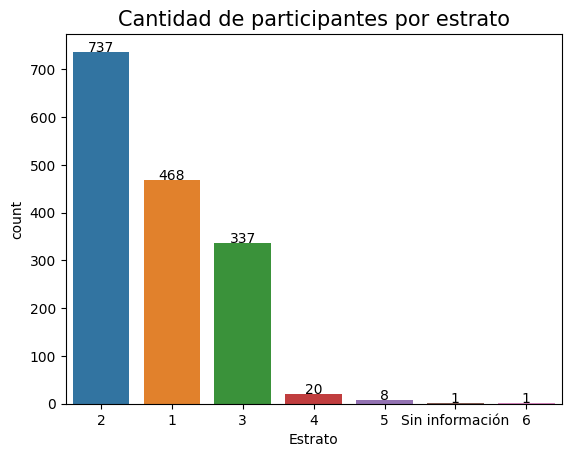

In [58]:
ax = sns.countplot(data=women_dataframe, x=women_dataframe.Estrato,order = women_dataframe.Estrato.value_counts().index)
ax.set_title('Cantidad de participantes por estrato', fontsize=15)
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        women_dataframe.Estrato.value_counts()[i],ha="center")
    i += 1
plt.show()

Porcentaje de mujeres encuestadas según grupo étnico

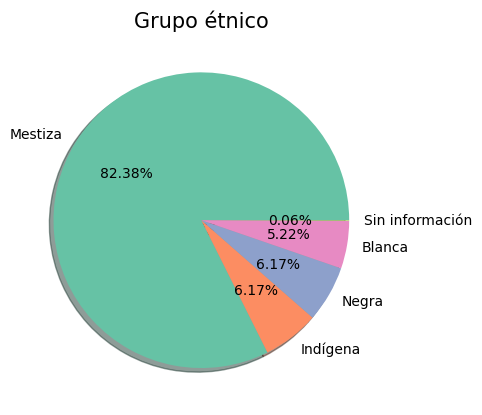

In [59]:
colors = sns.color_palette('Set2')
plt.pie(women_dataframe["Grupo étnico"].value_counts(), labels = women_dataframe["Grupo étnico"].value_counts().index, colors=colors, autopct='%.2f%%',shadow=True)
plt.title("Grupo étnico", fontsize=15)
plt.show()

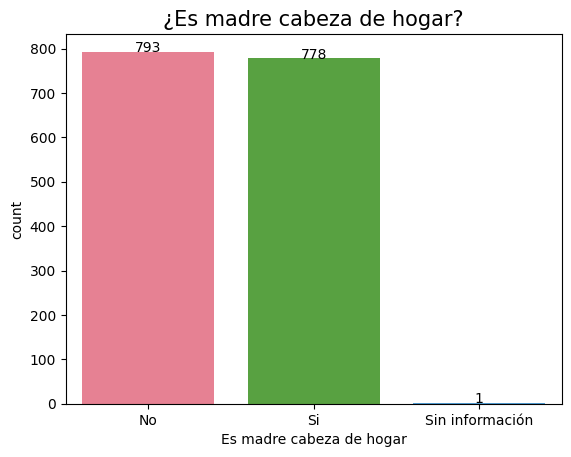

In [60]:
ax = sns.countplot(data=women_dataframe, x=women_dataframe["Es madre cabeza de hogar"],order = women_dataframe["Es madre cabeza de hogar"].value_counts().index,palette="husl")
ax.set_title('¿Es madre cabeza de hogar?', fontsize=15)
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        women_dataframe["Es madre cabeza de hogar"].value_counts()[i],ha="center")
    i += 1
plt.show()

*Aproximadamente la mitad de las mujeres encuestadas son madres cabeza de hogar*

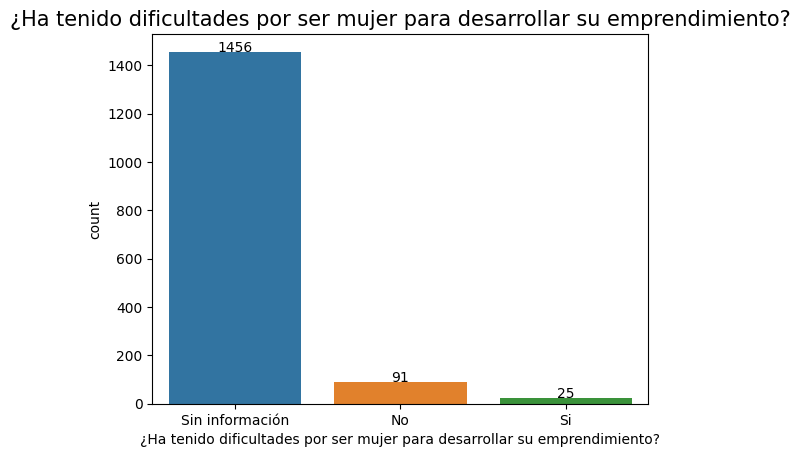

In [61]:
ax = sns.countplot(data=women_dataframe, x=women_dataframe["¿Ha tenido dificultades por ser mujer para desarrollar su emprendimiento?"],order = women_dataframe["¿Ha tenido dificultades por ser mujer para desarrollar su emprendimiento?"].value_counts().index)
ax.set_title('¿Ha tenido dificultades por ser mujer para desarrollar su emprendimiento?', fontsize=15)
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        women_dataframe["¿Ha tenido dificultades por ser mujer para desarrollar su emprendimiento?"].value_counts()[i],ha="center")
    i += 1
plt.show()

*No podemos concluir que el sexo del individuo fue un diferenciador para desarrollar emprendimientos en la ciudad en el 2018, según las mujeres encuestadas.*

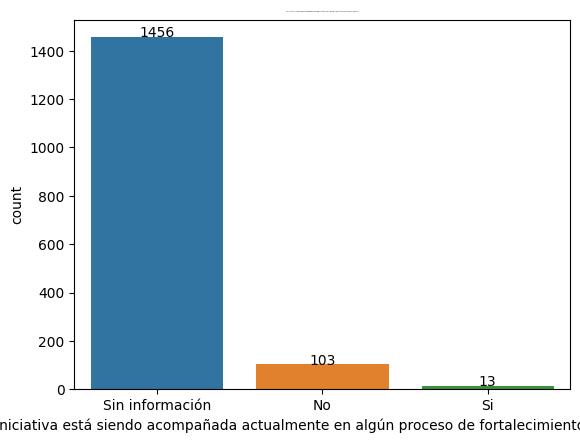

In [62]:
ax = sns.countplot(data=women_dataframe, x=women_dataframe["¿Su iniciativa está siendo acompañada actualmente en algún proceso de fortalecimiento empresarial?"],order = women_dataframe["¿Ha tenido dificultades por ser mujer para desarrollar su emprendimiento?"].value_counts().index)
ax.set_title("¿Su iniciativa está siendo acompañada actualmente en algún proceso de fortalecimiento empresarial?", fontsize=1)
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        women_dataframe["¿Su iniciativa está siendo acompañada actualmente en algún proceso de fortalecimiento empresarial?"].value_counts()[i],ha="center")
    i += 1
plt.show()

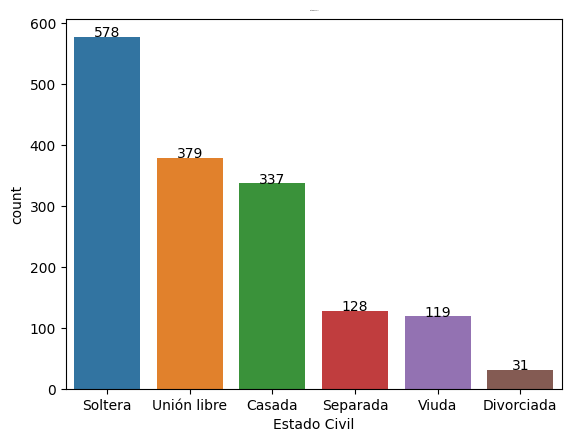

In [66]:
ax = sns.countplot(data=women_dataframe, x=women_dataframe["Estado Civil"],order = women_dataframe["Estado Civil"].value_counts().index)
ax.set_title("Estado Civil", fontsize=1)
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        women_dataframe["Estado Civil"].value_counts()[i],ha="center")
    i += 1
plt.show()

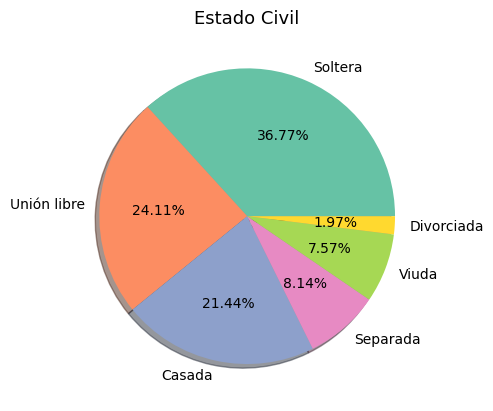

In [68]:
colors = sns.color_palette('Set2')
plt.pie(women_dataframe["Estado Civil"].value_counts(), labels = women_dataframe["Estado Civil"].value_counts().index, colors=colors, autopct='%.2f%%',shadow=True)
plt.title("Estado Civil", fontsize=13)
plt.show()